## Eigenvalue Change of Next Generation Matrix

Analytically derived a formula to predict the change in the largest eigenvalue of the next generation matrix when we remove one type of infected individual from a multi-group SIR model. This has importance as the largest eigenvalue/spectral radius of the next generation matrix gives the $R_0$ for the system. 

If we consider $\textbf{G}$ to be the next generation matrix for the entire multigroup model, with largest eigenvalue $\lambda$ that has associated left and right eigenvectors $\textbf{v}^T$ and $\textbf{u}$, then we define the relative importance of an infective node $I_k$ to be 
$$
\mathcal{I}_k = -\frac{\Delta \lambda}{\lambda} 
$$ where $\Delta \lambda$ is the change in the largest eigenvalue upon removal of $I_k$ from the system. We derived the following analytical approximation
$$
\mathcal{I}_k = \frac{\textbf{u}_k \textbf{v}_k}{\textbf{v}^{T}\textbf{u} - \textbf{u}_k \textbf{v}_k}.
$$

In this notebook, we will apply this approximation to a self-generated toy example.

### The Model

Each state has an average transmission rate $B_i = \sum_{j=1}^{7}B_{j,i}$ which gives a rate at which state $i$ infects the other states (including itself). We consider the following multi-group model:
\begin{align}
    &\frac{dS_i}{dt} = -\sum_{j=0}^{7}B_{i,j} N_i I_j \\
    &\frac{dI_i}{dt} = \sum_{j=0}^{7}B_{i,j} S_i I_j - \gamma_i I_i\\
    &\frac{dR_i}{dt} = \gamma_i I_i
\end{align}.

This system has a disease free solution, when $I_j = 0 \: \forall \:i$, and $S_i^* = \frac{\Lambda_i}{\mu_i}$.

### Age Groups
Group data using pre-specified groups from PLOS data.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

##### Importing Data from Contact Rate Paper
Paper Reference: https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.0050074#s5
We specifically use data from the Table S8.4b), which we have converted into csv format.

In [557]:
full_data = pd.read_csv("data/contact_data.csv", index_col=0)
full_data

,2,7,12,17,22,27,32,37,42,47,52,57,62,67,72
2,1.00,0.59,0.25,0.18,0.42,0.61,0.57,0.74,0.18,0.20,0.36,0.15,0.18,0.26,0.07
7,0.74,1.72,0.53,0.44,0.37,0.42,0.68,0.99,0.66,0.15,0.17,0.19,0.41,0.30,0.07
12,0.36,0.73,1.09,0.79,0.17,0.14,0.32,0.51,0.69,0.27,0.20,0.19,0.17,0.26,0.17
17,0.26,0.22,0.52,1.20,0.85,0.12,0.17,0.29,0.48,0.51,0.27,0.13,0.09,0.26,0.37
22,0.39,0.19,0.09,0.38,0.92,0.49,0.28,0.16,0.23,0.44,0.20,0.28,0.11,0.15,0.00
27,0.53,0.37,0.11,0.20,0.58,0.64,0.35,0.21,0.23,0.25,0.30,0.30,0.20,0.04,0.03
32,0.77,0.72,0.29,0.17,0.31,0.42,0.80,0.21,0.27,0.38,0.23,0.20,0.23,0.15,0.07
37,0.73,0.65,0.61,0.35,0.20,0.24,0.47,0.76,0.47,0.29,0.18,0.11,0.32,0.04,0.03
42,0.38,0.59,0.58,0.47,0.27,0.29,0.25,0.49,0.45,0.40,0.12,0.19,0.23,0.15,0.30
47,0.22,0.23,0.22,0.34,0.46,0.29,0.17,0.17,0.35,0.58,0.15,0.19,0.14,0.11,0.20


In [558]:
age_range = [2,7,12,17,22,27,32,37,42,47, 52,57,62,67,"70+"]

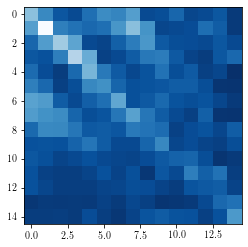

In [559]:
full_data = full_data.values
plt.imshow(full_data, cmap = "Blues_r")

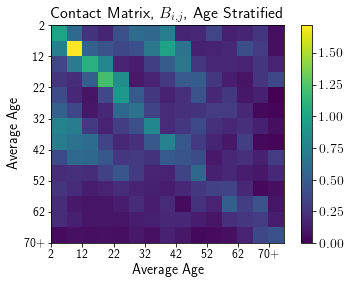

In [560]:
plt.imshow(full_data, interpolation="nearest")
x = np.arange(0,15,1) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 7 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(-0.5,nx - 0.5,step_x) # pixel count at label position
x_labels = x[::step_x] # labels you want to see

final_labels = []
for idx in x_labels.astype(int):
    if idx == 15:
        final_labels.append(age_range[idx - 1])
    else:
        final_labels.append(age_range[idx])
plt.xticks(x_positions, final_labels)
plt.yticks(x_positions, final_labels)
plt.xlabel("Average Age", fontsize = 14)
plt.ylabel("Average Age", fontsize = 14)
plt.title("Contact Matrix, $B_{i,j}$, Age Stratified", fontsize = 16)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

#plt.savefig("imgs/contract_rate_matrix.pdf", bbox_inches = "tight")

In [493]:
data = full_data

In [536]:
# aggregate to less granular level -  not used

# tempdata = np.zeros((5,15))

# #bins = [12, 27, 42, 57, 72]
# bins = [2, 5, 8, 11, 14]
# count = 0
# for i in bins:
#     tempdata[count, :] = np.mean((full_data[i], full_data[i - 1], full_data[i -2] ), axis = 0)
#     count+=1
    
# tempdata

# contact_data = np.zeros((5,5))
    
# cols = [2, 5, 8, 11, 14]
# count = 0

# for row in range(len(tempdata)):
#     count  = 0
#     for col in cols:
#         contact_data[row, count] = np.mean((tempdata[row, col], tempdata[row, col -1], tempdata[row, col - 2]))
#         count+=1
        
        
# plt.imshow(contact_data, cmap = "Blues_r")

## Defining other model parameters

We need to define the following for the model:
- The recovery rates of the fast and slow reporters.
- The population of each type ( we assume the same population level for each type, which appears to be realistic, https://www.statista.com/statistics/281174/uk-population-by-age/)

In [542]:
# Slow reporters (gamma_1)

gamma_1 = 0.5

# Fast Reporters (gamma_2)

gamma_2 = 0.8

gamma = [gamma_1]*len(data) + [gamma_2]*len(data) # recovery rates for the 10 different types

In [543]:
# generating the next generation matrix K

K = np.zeros((len(data)*2,len(data)*2))

for i in range(len(K)):
    for j in range(len(K)):
        K[i,j] = data[i % len(data),j % len(data)] / gamma[j] 

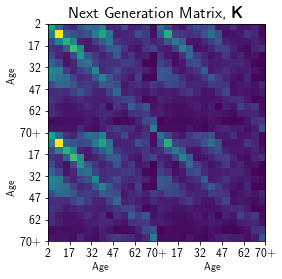

In [561]:
plt.imshow(K, interpolation="none", extent=[0,30,30,0])
plt.title("Next Generation Matrix, $\\textbf{K}$", fontsize = 16)


x = np.arange(0,31,1) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 10 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(0,nx,step_x) # pixel count at label position
x_labels = x[::step_x] # labels you want to see
x_labels = x_labels % 15
x_labels[5] = 15
x_labels[10] = 15

final_labels = []
for idk in x_labels:
    if idk == 15:
        final_labels.append(age_range[idk -1])
    else:
        final_labels.append(age_range[idk])

plt.xticks(x_positions, final_labels, fontsize = 12)
plt.yticks(x_positions, final_labels, fontsize = 12)
plt.ylabel("Age $\qquad \qquad \qquad  \qquad \quad$ Age")
plt.xlabel("Age $\qquad \qquad \qquad  \qquad \quad$ Age")

#plt.savefig("imgs/next_gen_matrix.png", dpi = 600, bbox_inches = "tight")

### Finding the $\mathcal{R}_0$ of the model and eigenvalue decomposition.

In [545]:
import scipy.linalg

values, left, right = scipy.linalg.eig(K, right = True, left = True)

values = np.abs(values)

# finding eigenvectors corresponding to largest eval
lam = values[0]
lvec = left[:, 0]
rvec = right[:, 0]

In [546]:
values

array([1.61091323e+01, 4.85096874e+00, 4.85096874e+00, 3.08542245e+00,
       1.67777730e+00, 1.47324012e+00, 1.47324012e+00, 1.17292964e+00,
       9.59011312e-01, 9.59011312e-01, 6.88101872e-01, 3.87433784e-01,
       3.87433784e-01, 2.60638428e-01, 1.11981802e-01, 3.59112222e-16,
       3.16622533e-16, 3.16622533e-16, 1.89127395e-16, 1.89127395e-16,
       1.39586372e-16, 9.76917161e-17, 1.00574144e-16, 7.59739866e-17,
       7.59739866e-17, 5.95954100e-17, 5.95954100e-17, 2.73320115e-17,
       2.73320115e-17, 3.05862567e-17])

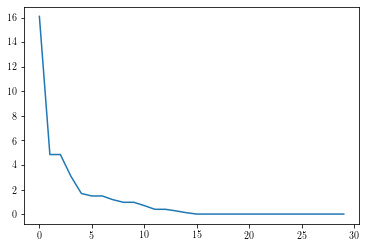

In [547]:
plt.plot(values)

### Type and Contact Importance

In [548]:
def type_importance(K, lam, lvec, rvec):
    arr = []
    norm = lvec.dot(rvec)
    for i in range(len(lvec)):
        arr.append((rvec[i]*lvec[i]) / (norm - lvec[i]*rvec[i]))
    return arr
    

In [549]:
I_type = type_importance(K, lam, lvec, rvec)

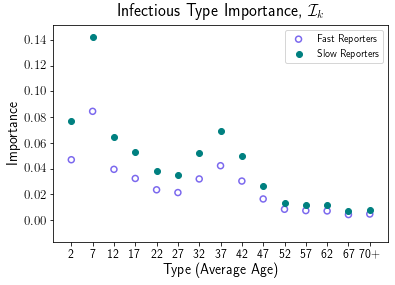

In [562]:
plt.scatter(range(len(I_type))[:len(data)], I_type[len(data):], marker = "o", facecolors = "none", edgecolors = "mediumslateblue", linewidth = 1.5)
plt.scatter(range(len(I_type))[:len(data)], I_type[:len(data)], color = "teal")
plt.title("Infectious Type Importance, $\mathcal{I}_k$", fontsize = 17)
plt.ylabel("Importance", fontsize  = 14)
plt.xlabel("Type (Average Age)", fontsize = 14)
plt.yticks(fontsize = 13)

x = np.arange(0,15,1) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 9 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(-0,nx - 0.5,step_x) # pixel count at label position
x_labels = x[::step_x] # labels you want to see

final_labels = []
for idx in x_labels.astype(int):
    final_labels.append(age_range[idx])
plt.xticks(x_positions, final_labels, fontsize = 12)

plt.legend(["Fast Reporters", "Slow Reporters"])

#plt.savefig("imgs/infectious_type.pdf", bbox_inches = "tight")

In [551]:
age_range

[2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, '70+']

In [552]:
def contact_importance(K, lam, lvec, rvec):
    norm = lvec.dot(rvec)
    I = np.zeros((len(K), len(K))) # K must be square matrix
    for i in range(len(I)):
        for j in range(len(I)):
            I[i,j] = K[i,j]*lvec[i]*rvec[j]/(lam * norm)
            
    return I

In [553]:
I_contact = contact_importance(K, lam, lvec, rvec)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


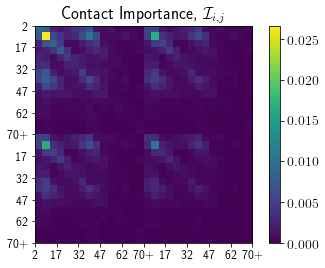

In [564]:
plt.imshow(I_contact)
x = np.arange(0,31,1) # the grid to which your data corresponds
nx = x.shape[0]
no_labels = 10 # how many labels to see on axis x
step_x = int(nx / (no_labels - 1)) # step between consecutive labels
x_positions = np.arange(-0.5,nx -0.5,step_x) # pixel count at label position
x_labels = x[::step_x] # labels you want to see
x_labels = x_labels % 15
x_labels[5] = 15
x_labels[10] = 15

final_labels = []
for idk in x_labels:
    if idk == 15:
        final_labels.append(age_range[idk -1])
    else:
        final_labels.append(age_range[idk])

plt.xticks(x_positions, final_labels, fontsize = 12)
plt.yticks(x_positions, final_labels, fontsize = 12)

plt.title("Contact Importance, $\mathcal{I}_{i,j}$", fontsize = 17)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#plt.savefig("imgs/contact_importance_png_version.png", dpi=600)

In [555]:
I_1 = I_contact[:7, :7]


I_2 = I_contact[15:22, 15:22]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


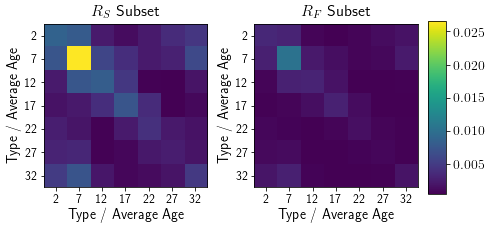

In [563]:
import matplotlib.colors as colors
import matplotlib
import copy


fig, (ax1, ax2) = plt.subplots(1,2)



colormap = matplotlib.cm.viridis #or any other colormap
normalize = matplotlib.colors.Normalize(vmin=np.min(I_1), vmax= np.max(I_1))
im1 = ax1.imshow(I_1, cmap=colormap, norm=normalize)


ax1.set_title("$R_S$ Subset", fontsize = 16)
ax1.set_xlabel("Type / Average Age", fontsize = 14)
ax1.set_ylabel("Type / Average Age", fontsize = 14)


ax2.imshow(I_2, cmap=colormap, norm=normalize)
ax2.set_title("$R_F$ Subset", fontsize = 16)
ax2.set_xlabel("Type / Average Age", fontsize = 14)
ax2.set_ylabel("Type / Average Age", fontsize = 14)


cbar_ax = fig.add_axes([1.0, 0.2, 0.04, 0.6])
cbar = plt.colorbar(im1, cax = cbar_ax)
cbar.ax.tick_params(labelsize=14) 


final_labels = [2, 7, 12, 17, 22, 27, 32]
locs = ax1.get_yticks()


ax1.set_xticklabels( final_labels, fontsize = 12)

ax1.set_xticks(locs[1:-1])

ax1.set_yticklabels([""] + final_labels, fontsize = 12)

ax2.set_xticklabels( final_labels, fontsize = 12)

ax2.set_xticks(locs[1:-1])

ax2.set_yticklabels([""] + final_labels, fontsize = 12)

plt.tight_layout()

#plt.savefig("imgs/contact_importance_subset_plot.pdf", bbox_inches = "tight")

### Second Example: Self-Generated Data

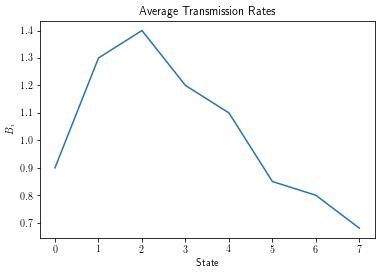

In [407]:
# defining all parameters

states = [0,1,2,3,4,5,6,7]
average_transmission = [0.9, 1.3, 1.4, 1.2, 1.1, 0.85, 0.8, 0.68]
mu = [1]*8
Lambda = [1]*8
Lambda[0] = 1.2
gamma = 0.8 + 0.4*np.random.rand(8)

# disease-free state values
s_dfs = [0]*8
for i in range(len(s_dfs)):
    s_dfs[i] = Lambda[i] / mu[i]


plt.title("Average Transmission Rates")
plt.ylabel("$B_i$")
plt.xlabel("State")
plt.plot(states, average_transmission)
plt.show()

In [408]:
# generating the actual transmission rates
# sampling from a normal distribution w/ mean of the transmisson rates and a std of 0.1.

B = np.zeros((8,8))
for i in range(8):
    mean = average_transmission[i]
    for j in range(8):
        B[j,i] = 0.05*np.random.randn() + mean

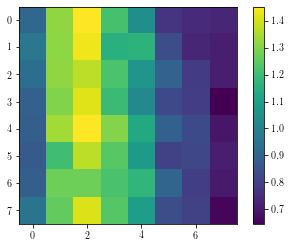

In [409]:
plt.imshow(B)
plt.colorbar()
plt.show()

### Next Generation Matrix

We obtain the next generation matrix $\textbf{G}$ by first constructing two matrices $\textbf{T}$ and $\mathbf{\Sigma}$ so that
$$
\dot{\textbf{x}} = (\textbf{T} + \mathbf{\Sigma})\textbf{x}, \quad \text{where } \textbf{x} = (I_1, I_2, ..., I_n)^T.
$$
The matrix $\textbf{T}$ represents terms in the ODE system that contribute to the disease transmission; in our example
$$
\textbf{T} = \begin{bmatrix} 
    B_{11}S_1^* & B_{12} S_{1}^* & \dots & B_{1n} S_{1}^*\\
    \vdots & \ddots & & \vdots \\
    B_{n1} S_n^* &  \dots  &    & B_{nn} S_n^* 
    \end{bmatrix}.
$$
Likewise, the matrix $\mathbf{\Sigma}$ represents all non-disease related transmissions within the infectious sub-system. In our example, this is
$$
\mathbf{\Sigma} = \begin{bmatrix} 
    -(\gamma_1 + \mu_1) & 0 & \dots & 0\\
    0 & -(\gamma_2 + \mu_2) & \dots & 0 \\
    \vdots & \ddots & & \vdots \\
    0 &  \dots  &    & -(\gamma_n + \mu_n) \\
    \end{bmatrix}.
$$

Using the fact that $\textbf{G} = -\textbf{T}\mathbf{\Sigma}^{-1}$, we have the next generation matrix:
$$
\textbf{G} = \begin{bmatrix} 
    \frac{B_{11}S_1^*}{\gamma_1 + \mu_1} & \frac{B_{12}S_1^*}{\gamma_2 + \mu_2} & \dots & \frac{B_{1n}S_1^*}{\gamma_n + \mu_n}\\
    \vdots & \ddots & & \vdots \\
    \frac{B_{n1}S_n^*}{\gamma_1 + \mu_1} &  \dots  &    & \frac{B_{nn}S_n^*}{\gamma_n + \mu_n} 
    \end{bmatrix}.
$$

In [410]:
T = np.zeros((8,8))
Sigma = np.zeros((8,8))

for i in range(8):
    for j in range(8):
        T[i,j] = B[i,j]*s_dfs[i]
        if i ==j:
            Sigma[i,j] = -(gamma[i] + mu[i])
            
G = -T.dot(np.linalg.inv(Sigma))

### Infective State Importance

By computing eigenvectors and the largest eigenvalue of $\textbf{G}$, we can find an approximation to the importance of each infectious state.

In [411]:
import scipy.linalg

values, left, right = scipy.linalg.eig(G, right = True, left = True)

values = np.abs(values)

The Largest Eigenvalue of the Matrix is: 4.16


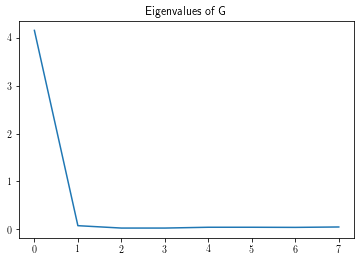

In [412]:
# l_e-  largest eigenvalue
# lvec - corresponding left eigenvector
# rvec - corresponding right eigenvector
l_e = values[0]
lvec = left[:, 0]
rvec = right[:, 0]

print("The Largest Eigenvalue of the Matrix is: " + str(np.round(l_e,2)))
plt.plot(values)
plt.title("Eigenvalues of G")
plt.show()

In [413]:
# finding the important of each state from the eigenvalues and eigenvectors

imp_list = []
norm = abs(lvec.dot(rvec))
print("Relative Importance of Infectious nodes for contribution to R_0:")
for i in range(len(lvec)):
    imp = np.real(rvec[i]*lvec[i] / (norm - rvec[i]*lvec[i]))
    imp_list.append(imp)
    print("I_{}".format(i+1) + " = " + str(np.round(imp,2)))

Relative Importance of Infectious nodes for contribution to R_0:
I_1 = 0.14
I_2 = 0.17
I_3 = 0.22
I_4 = 0.15
I_5 = 0.16
I_6 = 0.11
I_7 = 0.11
I_8 = 0.09


Text(0.5, 0, 'Infectious node $\\mathcal{I}_k$')

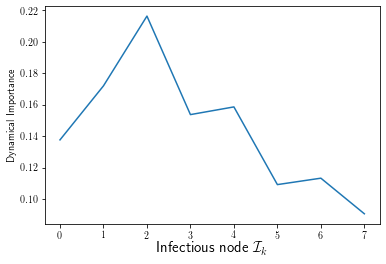

In [414]:
plt.plot(imp_list)
plt.ylabel("Dynamical Importance")
plt.xlabel("Infectious node $\mathcal{I}_k$", fontsize = 15)
#plt.savefig("node_importance.pdf", bbox_inches = "tight")

### Importance Matrix of the Contacts between the members of the population

In [415]:
I = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        I[i,j] = G[i,j]*lvec[i]*rvec[j] / (l_e*norm)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


Text(0, 0.5, 'States, $i$')

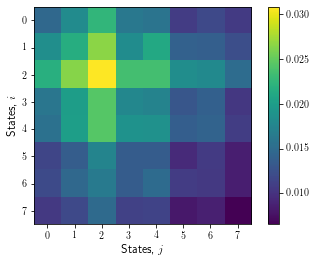

In [416]:
plt.imshow(I)
plt.colorbar()
plt.locator_params(axis='x', nbins=8)
plt.xlabel("States, $j$", fontsize = 12)
plt.ylabel("States, $i$", fontsize = 12)
#plt.savefig("edge_importance.pdf", bbox_inches = "tight")

### Extension, Male and Female Seperation without a Contact Matrix

In [26]:
# defining all parameters

states = list(range(16))
average_transmission = [0.9, 1.3, 1.4, 1.2, 1.1, 0.85, 0.8, 0.68]*2
mu = [1]*16
Lambda = [1]*16
Lambda[0] = 1.2
Lambda[8] = 1.2
gamma_1 = 0.9 + 0.4*np.random.rand(8) # slow responders
gamma_2 = 0.6 + 0.2*np.random.rand(8) # fast responders

gamma = np.concatenate((gamma_1, gamma_2))
# disease-free state values
s_dfs = [0]*16
for i in range(len(s_dfs)):
    s_dfs[i] = Lambda[i] / gamma[i]


# plt.title("Average Transmission Rates")
# plt.ylabel("B_i")
# plt.xlabel("State")
# plt.plot(states, average_transmission)
# plt.show()

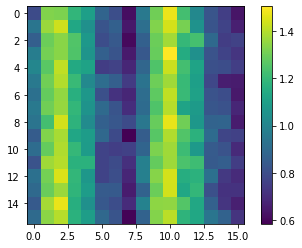

In [27]:
# generating the actual transmission rates
# sampling from a normal distribution w/ mean of the transmisson rates and a std of 0.1.

B = np.zeros((16,16))
for i in range(16):
    mean = average_transmission[i]
    for j in range(16):
        B[j,i] = 0.05*np.random.randn() + mean
        
plt.imshow(B)
plt.colorbar()
plt.show()

In [28]:
# Generating the Next Generation Matrix

T = np.zeros((16,16))
Sigma = np.zeros((16,16))

for i in range(16):
    for j in range(16):
        T[i,j] = B[i,j]*s_dfs[i]
        if i ==j:
            Sigma[i,j] = -(gamma[i] + mu[i])
            
G = -T.dot(np.linalg.inv(Sigma))

The Largest Eigenvalue of the Matrix is: 10.82


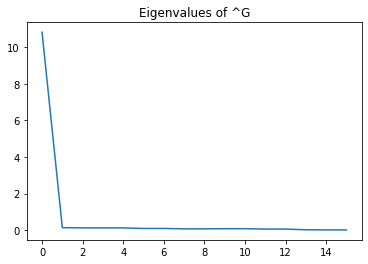

In [29]:
import scipy.linalg

values, left, right = scipy.linalg.eig(G, right = True, left = True)
values = np.abs(values)

# l_e-  largest eigenvalue
# lvec - corresponding left eigenvector
# rvec - corresponding right eigenvector
l_e = values[0]
lvec = left[:, 0]
rvec = right[:, 0]

print("The Largest Eigenvalue of the Matrix is: " + str(np.round(l_e,2)))
plt.plot(values)
plt.title("Eigenvalues of ^G")
plt.show()

In [30]:
# finding the important of each state from the eigenvalues and eigenvectors

imp_list = []
norm = abs(lvec.dot(rvec))
print("Relative Importance of Infectious nodes for contribution to R_0:")
for i in range(len(lvec)):
    imp = np.real(rvec[i]*lvec[i] / (norm - rvec[i]*lvec[i]))
    imp_list.append(imp)
    print("I_{}".format(i+1) + " = " + str(np.round(imp,2)))

Relative Importance of Infectious nodes for contribution to R_0:
I_1 = 0.05
I_2 = 0.06
I_3 = 0.06
I_4 = 0.06
I_5 = 0.06
I_6 = 0.04
I_7 = 0.03
I_8 = 0.02
I_9 = 0.09
I_10 = 0.11
I_11 = 0.12
I_12 = 0.09
I_13 = 0.09
I_14 = 0.08
I_15 = 0.06
I_16 = 0.06


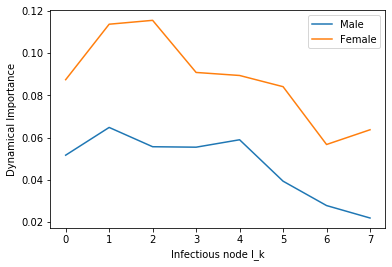

In [31]:
plt.plot(imp_list[:8])
plt.ylabel("Dynamical Importance")
plt.xlabel("Infectious node I_k")
plt.plot(imp_list[8:])
plt.legend(["Male", "Female"])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


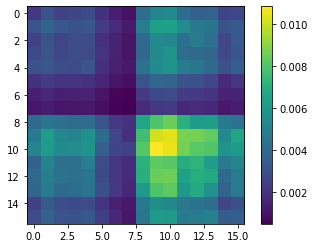

In [32]:
I = np.zeros((16,16))
for i in range(16):
    for j in range(16):
        I[i,j] = G[i,j]*lvec[i]*rvec[j] / (l_e*norm)
        
plt.imshow(I)
plt.colorbar()
plt.show()